In [87]:
# ----------------------------------------------------------------------------
#
# TITLE - AST1420_2018_PS1_JAMESLANE
# AUTHOR - James Lane
# PROJECT - AST 1420
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''
Assignment 1 for AST 1501
'''

__author__ = "James Lane"

In [88]:
### Imports

## Basic
import numpy as np
import sys, os, pdb

## Plotting
from matplotlib import pyplot as plt
import matplotlib.colors
import matplotlib.cm

## Astropy
# from astropy.io import fits
# from astropy.coordinates import SkyCoord
# from astropy import table
from astropy import units as apu
# from astropy import wcs

## galpy
from galpy import orbit
from galpy import potential
# from galpy.util import bovy_coords as gpcoords

## Scipy
from scipy.integrate import quad
from scipy.integrate import odeint

# Q1: Timing the Local Group
## a) The gravitational case

Following BT08, we consider their equations 3.28a and 3.28b, which are general results for a Keplarian orbits:

$
r = a(1-e \cos\eta )
$

$
t = \frac{T_{r}}{2\pi}(\eta-e \sin\eta )
$

Taking the natural logarithm of both equation:

$
\ln r = \ln a(1-e \cos\eta )
$

$
\ln t = \ln \frac{T_{r}}{2\pi}(\eta-e \sin\eta )
$

Now differentiate with respect to $\eta$

$
\frac{d \ln r}{d\eta} = \frac{ ae \sin \eta }{ a(1-e \cos \eta) }
$

$
\frac{d \ln t}{d\eta} = \frac{ T_{r}/2\pi( 1-e \cos \eta ) }{ T_{r}/2\pi (\eta-e \sin \eta) }
$

Cancelling constants and dividing the two equations we have:

$
\frac{ d \ln r / d \eta }{ d \ln t / d \eta } = \frac{ e \sin \eta (\eta-e \sin \eta)  }{ (1-e \cos \eta) ( 1-e \cos \eta )  }
$

Which becomes:

$
\frac{ d \ln r }{ d \ln t } = \frac{ e \sin \eta (\eta-e \sin \eta)  }{ ( 1-e \cos \eta )^{2}  }
$

Identifying that:

$
\frac{ d \ln r }{ d \ln t } = \frac{ t }{ r } \frac{ dr }{ dt } = \frac{ t v }{ r } = \frac{ (13.7\, \text{Gyr})(-125\, \text{km s}^{-1}) }{740\, \text{kpc}}
$

And setting $e=1$, we get an equation for $\eta$:

$
\frac{ (13.7\, \text{Gyr})(-125\, \text{km s}^{-1}) }{740\, \text{kpc}} = \frac{ \sin \eta (\eta-\sin \eta)  }{ ( 1-\cos \eta )^{2}  }
$

Simplifying the constant:

$
-2.365 = \frac{ \sin \eta (\eta-\sin \eta)  }{ ( 1-\cos \eta )^{2}  }
$

Wolfram Alpha says the smallest positive root of this equation is $\eta=4.285$. Solving 3.28a for the semi-major axis:

$
740\,\text{kpc} = a(1-\cos(4.285)) = 1.415a
$

$
a=523\, \text{kpc}
$

and 3.28b for the period:

$
13.7\,\text{Gyr} = T_{r}(4.285-\cos(4.285))/2\pi = 0.8268T_{r}
$

$
T_{r} = 16.6\, \text{Gyr}
$

These values in equation 3.31 yield:

$
16.6\, \text{Gyr} = 2\pi \sqrt{ \frac{ 523\, \text{kpc} }{ \text{GM} } }
$

Gives $4.5\times10^{12}$ M$_{\odot}$

## b) The addition of Dark Energy

Consider an expression (5.13 in AST1420 notes) for the radial period in a spherical mass distribution, on a radial orbit such that $L=0$:

$T_{r} = 2\int^{ r_{a} }_{ r_{p} } \frac{ dr }{ \sqrt{2[E-\Phi(r)]} }$

If we split the integral into two parts and choose appropriate bounds (the beginning of the universe at $r=0$ and now at $r=r_{0}$, then we can set the answer equal to the age of the universe, 13.7 Gyr:

$13.7~\text{Gyr} = \int^{ r_{a} }_{ 0 } \frac{ dr }{ \sqrt{2[E-\Phi(r)]} } + \int^{ r_{a} }_{ r_{0} } \frac{ dr }{ \sqrt{2[E-\Phi(r)]} } $ **(1)**

Contributing to this equation is the potential energy, $\Phi(r)$, which has a gravitational term and a term arising from the contribution of dark energy. Given an acceleration which takes the form $a_{DE} = \Lambda r / 3$ (where $\Lambda$ is a constant). The corresponding potential energy term is:

$\int d\Phi_{DE} = -\frac{ \Lambda }{ 3 }\int r dr$

$\Phi_{DE}(r) = -\frac{ \Lambda r^{2} }{ 6 }$

And the total potential energy is therefore:

$\Phi(r) = -\frac{ \text{G}M }{ r } - \frac{ \Lambda r^{2} }{ 6 }$

We can also consider conservation of energy as a constraint on the behaviour of this system. We equate the energy at the present day with the energy at maximum separation:

$E_{0} = \frac{ v^{2}_{0} }{ 2 } - \frac{ \text{G}M_{T} }{ r_{0} } - \frac{ \Lambda r_{0}^{2} }{ 6 }$

$E_{0} = E_{a} =  - \frac{ \text{G}M_{T} }{ r_{a} } - \frac{ \Lambda r_{a}^{2} }{ 6 }$

Where in this equality $r_{0}$ is the current separation of $740$ kpc, $r_{a}$ is the unknown apocenter separation of the two galaxies, and $v_{0}$ is the current relative velocity of $-125$ km/s.

This system of two equations has two unknowns: $M{T}$ is the total mass of the Milky Way and M31, and $r_{a}$ is the maximum separation of the two galaxies which occured some time in the past. This means it has a unique solution, but one which can not be reached analytically, but only approximately through numerical methods. This is because the integral which solves for the radial period has no analytical solution, since it takes the form:

$\int \frac{ dr }{ \sqrt{ 2( A\frac{1}{r} + Br^{2} + C\frac{M_{T}}{r_{0}} + Dr_{0}^2 + E) } }$

Where $A$ through $E$ are known constants. Basic online integrators show no solutions for integrals of this form. So a numerical approach must be taken that returns an approximate answer.

To approach this problem consider using the conservation of energy equation as a generator for $M_{T}$, given a value for $r_{a}$ (could work in the opposite way but solving for $M_{T}$ is simpler. This would give values for $M_{T}$ and E, meaning that the integrals in equation **1** will return values. We know that selecting the correct value of $r_{a}$ will set the proper value of $M_{T}$, resulting in equation **1** returning a correct answer for the age of the universe: 13.7 Gyr.

To implement this solution we first require a value for the cosmological constant, $\Lambda$. We know that:

$\Lambda = \frac{ 8 \pi G \varepsilon_{\Lambda} }{ c^{2} }$

Where $\varepsilon_{\Lambda} = \Omega_{\Lambda} \varepsilon_{c}$, with $\Omega_{\Lambda}$ being 0.7 and $\varepsilon_{c}$ being the critical energy density of the universe. The critical energy density of the universe takes the form:

$\varepsilon_{c} = \frac{ 3 H^{2}_{0} c^{2} }{ 8 \pi G }$

Therefore the cosmological constant is:

$\frac{ \Lambda }{ 3 } = H^{2}_{0}\Omega_{\Lambda} = 3.6\times10^{-36} \text{s}^{-2}$

Or equivalently:

$\frac{\Lambda}{3} = 0.00343 [ \text{s}^{-2}\, \text{km}^{2}\, \text{kpc}^{-2} ]$

To implement this solution we first require our generator function which returns $M_{T}$ given a supplied $r_{a}$. For this we will rearrange the conservation of energy equation to solve for $M_{T}$:

$M_{T} = \frac{ \frac{ \Lambda }{ 6 } \big(r^{2}_{0} - r^{2}_{a} \big) - \frac{ v^{2}_{0} }{ 2 } }{ G \big( \frac{ 1 }{ r_{a} } - \frac{ 1 }{ r_{0} } \big) }$

Plugging in known constants gives a formula for $M_{T}$ in solar masses in terms of $r_{a}$ in kpc:

$\frac{ M_{T} }{ \text{M}_{\odot} } = \frac{ (0.00171 [ \text{km}^{2}\, \text{s}^{-2}\, \text{kpc}^{-2} ]) (5.48\times10^{5}[\text{kpc}^{2}] - r^{2}_{a} ) -  2.74\times10^{5}[\text{km}^{2}\, \text{s}^{-2}] }{ 4.302\times10^{-6}[\text{kpc}\, \text{km}^{2}\, \text{s}^{-2}\, \text{M}_{\odot}^{-1}] \big( \frac{ 1 }{ r_{a} } - \frac{ 1 }{ 740 [\text{kpc}] } \big) }$

Define this function:

In [89]:
# Define the generator function which returns the total mass for a 
# given apocenter radius:
def mtot_generator(ra):
    return ( (0.00171)*(5.48*10**5-ra**2)-7812.5 ) / ( ( 4.302*10**-6 )*(1/ra-1/740) )
#def

Now the function within the integrals of equation **1** takes the form:

$I(r;M_{T},E) = \frac{ 1 }{ \sqrt{ 2 \big( E + \frac{ GM_{T} }{ r } + \frac{ \Lambda r^{2} }{ 6 } \big) } }$

Define this function:

In [90]:
# Define the function inside the integral of equation 1:
def integral_function(r,mtot,E):
    return 3.086*10**16 / np.sqrt(2*( E + ((4.302*10**-6)*mtot/r) + (0.00171*r**2) ) ) 
#def

Now define a function that will solve for the energy given the total mass and the apocenter radius.

$E = -\frac{ GM_{T} }{ r_{a} } - \frac{ \Lambda r_{a}^{2} }{ 6 }$

In [91]:
# Define a function to return energy in km**2/s**2
def energy(mtot,ra):
    return ( -(4.302*10**-6) * mtot / ra ) - ( 0.00171*ra**2 )
#def

Define a function to evaluate the integrals and return the age of the universe and the mass used

In [92]:
# Define a function to evaluate the time of the universe
def evaluate_time(ra):
    mtot = mtot_generator(ra)
    e = energy(mtot, ra)
    t0 = quad( integral_function, a=740, b=ra, args=(mtot,e) )
    t1 = quad( integral_function, a=0.1, b=ra, args=(mtot,e) )
    t_universe = (t0[0]+t1[0])/(3.1536*10**16) # In Gyr
    mtot12 = mtot/10**12 # In 10^12 Msol
    return [t_universe,mtot12]
#def

To approach this problem we will consider an error in the time $dt$, which we will seek to minimize. Set an initial apocenter radius and an initial change in radius $dr_{0}$. We will iterate, evaluating the time at the assumed apocenter radius, and changing the apocenter radius by an amount proportional to the value of $dt$, which is the difference between evaluated and known age of the universe. We will converge to a value for the apocenter radius using this manner.

In [93]:
# Initialize with values that will start the loop
ra = 1000
error = 0.001 # In Gyr
dr0 = 1 # kpc
dt = 1 # Gyr

while np.abs(dt) > error:
    
    # Change ra by an amount proportional to the difference between 
    # the calculated time and the target time.
    ra += dr0*dt
    
    # Evaluate the new time and mass
    t_uni,mtot = evaluate_time(ra)
    
    # Update dt
    dt = 13.7-t_uni
    
#     print('ra='+str( round(ra,2) )+\
#           ', tu='+str( round(t_uni,2) )+\
#           ', mtot='+str( round(mtot,2) ) )

##wh
    
print('Done: ra='+str( round(ra,1) )+' kpc'\
      ', tu='+str( round(t_uni,1) )+' Gyr'\
      ', mtot='+str( round(mtot,1) )+'x10**12 Msol'\
      ', mtot/4.6='+str( round(mtot/4.6,3) ))

Done: ra=1041.3 kpc, tu=13.7 Gyr, mtot=5.2x10**12 Msol, mtot/4.6=1.128


Therefore we see that the mass of the two galaxies is about $5.2\times10^{12}$ M$_{\odot}$, which is about 13% greater than the case without considering dark energy. The maximum separation in this case is about 1040 kpc.

# Q2: Adding Energy to an Orbit
## a) Perturbed orbits in the spherical isochrone potential
First we will define our potential, and orbit. Normalize the galpy potential so the circular velocity at $r=1$ is $v_{c}=1$. We will consider three orbits: one which has tangential velocity greater than the circular velocity by $20\%$, one which has a radial velocity $20\%$ the circular value, and one which has both of the previous qualities. All orbits will have $z=0$ and $v_{z}=0$, and since this potential is spherical there is no loss of generality by not considering $z$ and $v_{z}$ as all orbits occur in arbitrary planes. Each orbit will be integrated for 1 Gyr

In [94]:
pot = potential.IsochronePotential(amp=1.0, b=1.0, normalize=1.0)

# R, vR, vT, phi
orbit_vxvv = np.array([[1.0,0.0,1.2,0.0],
                       [1.0,0.2,1.0,0.0],
                       [1.0,0.2,1.2,0.0]])
orbit_colors = ['RoyalBlue', 'IndianRed', 'MediumPurple']

times = np.linspace(0,1,2000) * apu.Gyr

Now loop over the different orbits and evaluate each of them. Prepare a figure to show the movement in the radial direction as a function of time.

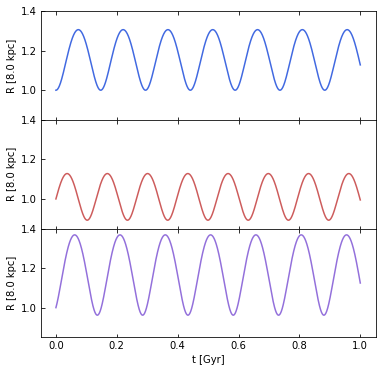

In [95]:
fig = plt.figure(figsize=(6,6))
axs = fig.subplots(nrows=len(orbit_vxvv), ncols=1)

len(axs)

for i in range(len(orbit_vxvv)):
    
    o = orbit.Orbit(vxvv=orbit_vxvv[i])
    o.turn_physical_off() # Specify in natural units
    o.integrate(times, pot)
    
    axs[i].plot(times, o.R(times), color=orbit_colors[i])
    axs[i].set_ylabel('R ['+str(pot._ro)+' kpc]')
    axs[i].set_ylim(0.85,1.4)
    axs[i].tick_params(left='on', top='on', direction='in')
    if i != len(orbit_vxvv)-1:
        axs[i].tick_params(labelbottom='off')
    ##fi
###i

axs[-1].set_xlabel('t [Gyr]')
fig.subplots_adjust(hspace=0)

plt.show()
plt.close('all')

### Figure 1:
Radius as a function of time for the three orbits. Shows that the the orbits explore a variety of radii.

Now for each of those orbits: run a them for a short time, grab the kinematics of a pericenter passage, and use those to start new orbits with velocity kicks. For $v_{c}$ and $v_{R}$ make the range of the kick between -1.5 and 1.5 (natural units) in steps of 0.05. For each new orbit, integrate it for 1 Gyr after the kick is applied. First do the tangential velocity kicks and plot the change in pericenter.

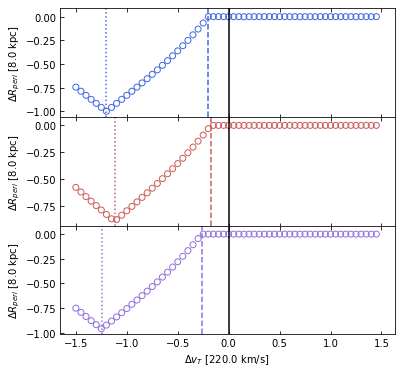

In [96]:
vT_range = np.arange(-1.5,1.5,0.05)

fig = plt.figure(figsize=(6,6))
axs = fig.subplots(nrows=len(orbit_vxvv), ncols=1)

for i in range(len(orbit_vxvv)):
    
    o = orbit.Orbit(vxvv=orbit_vxvv[i])
    o.turn_physical_off() # Specify in natural units
    o.integrate(times, pot)
    
    # Find a pericenter
    where_peri = np.argmin(o.R(times))
    R_peri = o.R(times)[where_peri]
    vR_peri = o.vR(times)[where_peri]
    vT_peri = o.vT(times)[where_peri]
    phi_peri = o.phi(times)[where_peri]
    
    # Loop over the range of kicks
    for j,dvT in enumerate(vT_range):
        
        o_temp = orbit.Orbit(vxvv=[R_peri,vR_peri,vT_peri+dvT,phi_peri])
        o_temp.integrate(times,pot)
        
        axs[i].scatter(dvT, o_temp.rperi()-R_peri, edgecolor=orbit_colors[i], facecolor='None')
        
        axs[i].set_ylabel('$\Delta R_{peri}$ ['+str(pot._ro)+' kpc]')
        axs[i].tick_params(left='on', top='on', direction='in')
        if i != len(orbit_vxvv)-1:
            axs[i].tick_params(labelbottom='off')
        ##fi
    ###j
    axs[i].axvline(potential.vcirc(pot,R_peri,0)-vT_peri, linestyle='dashed', color=orbit_colors[i])
    axs[i].axvline(-vT_peri, linestyle='dotted', color=orbit_colors[i])
    axs[i].axvline(0, linestyle='solid', color='Black')
###i

axs[-1].set_xlabel(r'$\Delta v_{T}$ ['+str(pot._vo)+' km/s]')
fig.subplots_adjust(hspace=0)

plt.show()
plt.close('all')

### FIgure 2
Change in pericenter radius as a function of applied change in tangential velocity. This plot shows interesting behaviour. Any increase in angular momentum at pericenter results in no change to the pericenter radius. Small decreases to the angular momentum yield the same result. It is not until the tangential velocity becomes equal to the local circular velocity (dashed lines in the figure) that the pericenter distance begins to change. Once the change in tangential velocity becomes equal to the original tangential velocity the pericenter radius begins to increase again. This is because the orbit has reversed its direction.

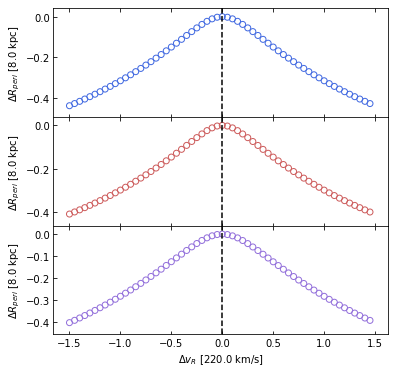

In [97]:
vR_range = np.arange(-1.5,1.5,0.05)

fig = plt.figure(figsize=(6,6))
axs = fig.subplots(nrows=len(orbit_vxvv), ncols=1)

for i in range(len(orbit_vxvv)):
    
    o = orbit.Orbit(vxvv=orbit_vxvv[i])
    o.turn_physical_off() # Specify in natural units
    o.integrate(times, pot)
    
    # Find a pericenter
    where_peri = np.argmin(o.R(times))
    R_peri = o.R(times)[where_peri]
    vR_peri = o.vR(times)[where_peri]
    vT_peri = o.vT(times)[where_peri]
    phi_peri = o.phi(times)[where_peri]
    
    # Loop over the range of kicks
    for j,dvR in enumerate(vR_range):
        
        o_temp = orbit.Orbit(vxvv=[R_peri,vR_peri+dvR,vT_peri,phi_peri])
        o_temp.integrate(times,pot)
        
        axs[i].scatter(dvR, o_temp.rperi()-R_peri, edgecolor=orbit_colors[i], facecolor='None')
        
        axs[i].set_ylabel('$\Delta R_{peri}$ ['+str(pot._ro)+' kpc]')
        axs[i].tick_params(left='on', top='on', direction='in')
        if i != len(orbit_vxvv)-1:
            axs[i].tick_params(labelbottom='off')
        ##fi
        
#         axs[i].axvline(1.0-vT_peri, linestyle='dotted', color=orbit_colors[i])
#         axs[i].axvline(-vT_peri, linestyle='dotted', color=orbit_colors[i])
    ###j
    axs[i].axvline(0, linestyle='dashed', color='Black')
###i

axs[-1].set_xlabel(r'$\Delta v_{R}$ ['+str(pot._vo)+' km/s]')
fig.subplots_adjust(hspace=0)

plt.show()
plt.close('all')

### Figure 3
Change in pericenter radius as a function of change in radial velocity. The figure shows that no matter the radial velocity offset the pericenter radius always decreases.

## b) Universality of perturbed behaviour in spherical potentials.

Consider a velocity kick that occurs at pericenter ($\dot{r}=0$), which takes the form $v_{T} \rightarrow v_{T}+\Delta$, where $\Delta$ could be positive or negative. The change in the orbital energy equation is:

$ E_{new} = \frac{ L_{new}^{2} }{ 2r^{2}_{p} } - \Phi(r_{p}) $

Now both $E$ and $L$ are functions of the square of the tangential velocity, therefore they become, respectively:

$ E_{new} = E + \frac{ (v_{T}\Delta+\Delta^{2}) }{ 2 }$

and 

$ L_{new} = L + r_{p}^{2} ( v_{T}\Delta + \Delta^{2} ) $

Now let's set $ v_{T}\Delta + \Delta^{2} = \epsilon $

So the perturbed energy equation becomes:

$ E + \frac{ \epsilon }{ 2 } = \frac{ L^{2} }{ 2r^{2}_{p} } + \frac{ r_{p}^{2} \epsilon }{ 2 r_{p}^{2} } - \Phi(r_{p}) $

Which obviously becomes:

$ E = \frac{ L^{2} }{ 2r^{2}_{p} } - \Phi(r_{p}) $

Which is the original equation, which permits the original solution for pericenter radius. So obviously the pericenter radius stays constant. This can be interpreted graphically by considering that orbits of a constant energy have two solutions for $E=\Phi_{eff}(r)$. When perturbed at pericenter the energy and the effective potential (through the angular momentum barrier) increase by the same amount, and therefore the pericenter radius stays the same.

Now consider what happens at apocenter for the same change in angular momentum. The orbital energy equation:

$ E + \frac{ \epsilon }{ 2 } = \frac{ L^{2} }{ 2r^{2}_{a} } + \frac{ r_{p}^{2} \epsilon }{ 2 r_{a}^{2} } - \Phi(r_{a
}) $

The key difference here is that the change in the square of the angular momentum is still $r_{p}^{2}\epsilon$ but this is evaluated at $r=r_{a}$. It is clear then that the same cancellation does not occur as happened when evaluated at pericenter. Instead the new formula becomes:

$ E + \frac{ \epsilon }{ 2 }\big( 1 - \frac{ r_{p}^{2} }{ r_{a}^{2} } \big) = \frac{ L^{2} }{ 2r^{2}_{a} } - \Phi(r_{a
}) $

Now let us label $ E + \frac{ \epsilon }{ 2 }\big( 1 - \frac{ r_{p}^{2} }{ r_{a}^{2} } \big) = E_{\ast} $, so we have:

$ E_{\ast} = \frac{ L^{2} }{ 2r^{2}_{a} } - \Phi(r_{a
}) $

As long as we assume $r_{a} > r_{p}$ and $\epsilon > 0$ (for simplicity consider $\Delta > 0$) then $E_{\ast} > E$ strictly. In order for this equation to remain an equality $r_{a}$ must change, as the only free parameter. Specifically the right side of the equation must increase. In general, the large-$r$ behaviour of an effective potential is controlled by $\Phi(r)$, since it can at most go as $\Phi(r) \propto 1/r$ (The point mass case, to which spherical potentials tend at large $r$) but often has a shallower profile, whereas the angular momentum barrier goes as $1/r^{2}$. Therefore it is logical to argue that to effectively increase the right hand side of the equation requires increasing $r_{a}$, which will increase the dominant $\Phi(r_{a})$ term, satisfying the equation.

This is in agreement with the numerical solution shown above. An increase in angular momentum applied at pericenter causes the pericenter distance to remain unchanged. Below it is shown that the apocenter radius does in fact increase with a positive angular momentum kick.

Now negative kicks need to be separated into two classes: those that do not reduce the tangential velocity below the local circular velocity, and those that do. Once the tangential velocity is reduced below circular then the kick is no longer being applied at pericenter, and instead at apocenter, and different considerations are required to interpret the results. To understand what happens during negative kicks consider the form of $\epsilon$ as a function of $\Delta$:

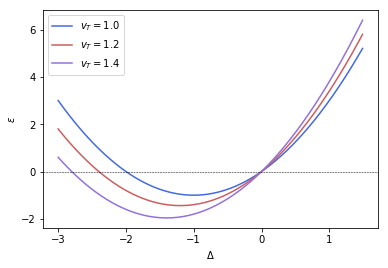

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)

dvT = np.arange(-3,1.5,0.01)
ax.plot( dvT, dvT**2 + 2*dvT*1.0, color=orbit_colors[0], label=r'$v_{T}=1.0$' )
ax.plot( dvT, dvT**2 + 2*dvT*1.2, color=orbit_colors[1], label=r'$v_{T}=1.2$' )
ax.plot( dvT, dvT**2 + 2*dvT*1.4, color=orbit_colors[2], label=r'$v_{T}=1.4$' )
ax.axhline( 0, linestyle='dashed', color='Black', linewidth=0.5 )
ax.legend()

ax.set_xlabel(r'$\Delta$')
ax.set_ylabel(r'$\epsilon$')

plt.show()
plt.close('all')

### Figure 4
The magnitude of the extra quadrature term, $\epsilon$ as a function of $\Delta$

We see that, for $\Delta < 0$, $\epsilon$ is negative, except when we reach $\Delta=-2v_{T}$ (The second root of the equation). This corresponds to a complete reversal of the orbit, and a beginning of an increase in the angular momentum but in the opposite direction. Given that in the regime between $v_{T}>v_{T}-\Delta>v_{c}$ that $\epsilon$ is negative we can consider what happens to the perturbed energy equation evaluated at pericenter.

$ E + \frac{ \epsilon }{ 2 } = \frac{ L^{2} }{ 2r^{2}_{p} } + \frac{ r_{p}^{2} \epsilon }{ 2 r_{p}^{2} } - \Phi(r_{p}) $

It is clear that nothing about this equation changes, since the two perturbative terms still cancel. This only occurs as long as we still consider this kick being applied at pericenter. The same solutions are still admitted and the pericenter does not change.

Now evaluating the change in angular momentum and energy, but at the apocenter of the orbit, we have again:

$ E + \frac{ \epsilon }{ 2 }\big( 1 - \frac{ r_{p}^{2} }{ r_{a}^{2} } \big) = \frac{ L^{2} }{ 2r^{2}_{a} } - \Phi(r_{a
}) $

Except now that we know $\Delta$ must be negative we have a different condition for $ E + \frac{ \epsilon }{ 2 }\big( 1 - \frac{ r_{p}^{2} }{ r_{a}^{2} } \big) = E_{\ast} $, which is that $E > E_{\ast}$. In a similar manner as is presented above, it is logical to argue that to preserve the equality $r_{a}$ must decrease, since the effective potential at apocenter is controlled by $\Phi(r_{a})$. There is however, a limit to this argument, which is that we recall $E_{\ast}$ is a function of $r_{a}$. It did not matter above since all we relied upon is the statement $E_{\ast}>E$, which is always true for $r_{a}>r_{p}$. But once $r_{a}$ is decreased there comes a point when $r_{a}=r_{p}$, at which point the expression by which $\epsilon$ is multiplied above becomes 0. While this equation does not break, the definitions must change. Now the kick is being applied at apocenter and the perturbative equation must reflect this.

Reconsider the perturbed energy equation at apocenter:

$ E + \frac{ \epsilon }{ 2 } = \frac{ L^{2} }{ 2r^{2}_{a} } + \frac{ r_{a}^{2} \epsilon }{ 2 r_{a}^{2} } - \Phi(r_{a}) $

Obviously the perturbative terms cancel, and the same solution for the apocenter radius remains. This is exactly the behaviour which used to occur at pericenter! Continuing on, consider the same equation evaluated at pericenter:

$ E + \frac{ \epsilon }{ 2 } = \frac{ L^{2} }{ 2r^{2}_{p} } + \frac{ r_{a}^{2} \epsilon }{ 2 r_{p}^{2} } - \Phi(r_{p
}) $

$ E + \frac{ \epsilon }{ 2 }\big( 1 - \frac{ r_{a}^{2} }{ r_{p}^{2} } \big) = \frac{ L^{2} }{ 2r^{2}_{p} } - \Phi(r_{p}) $

Clearly a similar solution is required as above. The left hand side of this equation can be labelled as $E_{\ast}$, which is strictly greater than $E$ (both $\epsilon$ and the radius term are negative). This implies the effective potential (right hand side) of the equation must increase. Now, however, we argue that $r_{p}$ must decrease to increase the effective potential, since the angular momentum term dominates the effective potential at pericenter. This behaviour agrees with what is seen in the above figures, namely that the pericenter radius begins to decrease when $\epsilon$ becomes more negative and $v_{T}+\Delta$ has dropped below the local circular velocity (marked by vertical dashed lines).

To understand the behaviour of Figure 3 we apply the same arguments as have been applied above. First consider a radial velocity kick applied at pericenter, which takes the form $v_{R} \rightarrow \Delta$, since at pericenter the radial velocity is 0 by definition. The orbital energy equation takes the form:

$
E + \frac{ ( \Delta^{2} ) }{2} = \frac{ L^{2} }{ 2r^{2}_{p} } + \Phi(r_{p})
$

Now it is clear that the perturbation can only increase the energy of the orbit, since there was no radial velocity component at pericenter to begin with. We can therefore again write:

$
E_{\ast} = \frac{ L^{2} }{ 2r^{2}_{p} } + \Phi(r_{p})
$

Where $E_{\ast}>E$ for all $\Delta$. Now to maintain the equality we need to increase the right hand side of the equation, which can only be done by adjusting the pericenter. Since we are at pericenter the angular momentum term dominates the effective potential, and so $r_{p}$ must decrease. This explains the observed behaviour in Figure 3.

Note that throughout these explanations, the only assumed property of the effective potential is that the angular momentum term dominates at pericenter and the potential term dominates at apocenter, which is a valid assumption for any centrally dense potential. Therefore these results hold in general for spherical potentials.

## c)
Now investigate what is happening to eccentricity and apocenter radius. We will perform the same orbital integrations as in a), except now we will track and plot the eccentricity and apocenter radius.

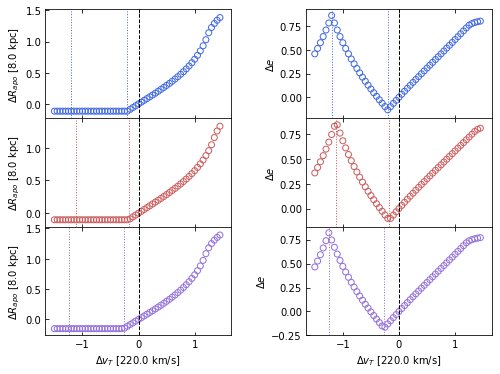

In [100]:
vT_range = np.arange(-1.5,1.5,0.05)

fig = plt.figure(figsize=(8,6))
axs = fig.subplots(nrows=len(orbit_vxvv), ncols=2)

for i in range(len(orbit_vxvv)):
    
    o = orbit.Orbit(vxvv=orbit_vxvv[i])
    o.turn_physical_off() # Specify in natural units
    o.integrate(times, pot)
    
    # Find a pericenter
    where_peri = np.argmin(o.R(times))
    R_peri = o.R(times)[where_peri]
    vR_peri = o.vR(times)[where_peri]
    vT_peri = o.vT(times)[where_peri]
    phi_peri = o.phi(times)[where_peri]
    
    # Also note the eccentricity and apocenter for comparison
    eccen = o.e()
    R_apo = o.rap()
    
    # Loop over the range of kicks
    for j,dvT in enumerate(vT_range):
        
        o_temp = orbit.Orbit(vxvv=[R_peri,vR_peri,vT_peri+dvT,phi_peri])
        o_temp.integrate(times,pot)
        
        axs[i,0].scatter(dvT, np.log10(o_temp.rap()/R_apo), edgecolor=orbit_colors[i], facecolor='None')
        axs[i,1].scatter(dvT, o_temp.e()-eccen, edgecolor=orbit_colors[i], facecolor='None')
        
        axs[i,0].set_ylabel('$\Delta R_{apo}$ ['+str(pot._ro)+' kpc]')
        axs[i,1].set_ylabel('$\Delta e$')
        axs[i,0].tick_params(left='on', top='on', direction='in')
        axs[i,1].tick_params(left='on', top='on', direction='in')
        if i != len(orbit_vxvv)-1:
            axs[i,0].tick_params(labelbottom='off')
            axs[i,1].tick_params(labelbottom='off')
        ##fi
    ###j
    axs[i,0].axvline(potential.vcirc(pot,R_peri,0)-vT_peri, linestyle='dotted', color=orbit_colors[i], lw=1)
    axs[i,1].axvline(potential.vcirc(pot,R_peri,0)-vT_peri, linestyle='dotted', color=orbit_colors[i], lw=1)
    axs[i,0].axvline(-vT_peri, linestyle='dotted', color=orbit_colors[i], lw=1)
    axs[i,1].axvline(-vT_peri, linestyle='dotted', color=orbit_colors[i], lw=1)
    axs[i,0].axvline(0, linestyle='dashed', color='Black', lw=1)
    axs[i,1].axvline(0, linestyle='dashed', color='Black', lw=1)
###i

axs[-1,0].set_xlabel(r'$\Delta v_{T}$ ['+str(pot._vo)+' km/s]')
axs[-1,1].set_xlabel(r'$\Delta v_{T}$ ['+str(pot._vo)+' km/s]')
fig.subplots_adjust(hspace=0, wspace=0.4)

plt.show()
plt.close('all')

### Figure 5
Change in apocenter and change in eccentricity as functions of a tangential velocity kick applied at pericenter.

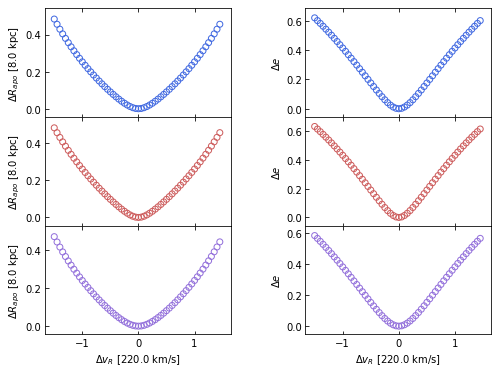

In [101]:
vR_range = np.arange(-1.5,1.5,0.05)

fig = plt.figure(figsize=(8,6))
axs = fig.subplots(nrows=len(orbit_vxvv), ncols=2)

for i in range(len(orbit_vxvv)):
    
    o = orbit.Orbit(vxvv=orbit_vxvv[i])
    o.turn_physical_off() # Specify in natural units
    o.integrate(times, pot)
    
    # Find a pericenter
    where_peri = np.argmin(o.R(times))
    R_peri = o.R(times)[where_peri]
    vR_peri = o.vR(times)[where_peri]
    vT_peri = o.vT(times)[where_peri]
    phi_peri = o.phi(times)[where_peri]
    
    # Also note the eccentricity and apocenter for comparison
    eccen = o.e()
    R_apo = o.rap()
    
    # Loop over the range of kicks
    for j,dvR in enumerate(vR_range):
        
        o_temp = orbit.Orbit(vxvv=[R_peri,vR_peri+dvR,vT_peri,phi_peri])
        o_temp.integrate(times,pot)
        
        axs[i,0].scatter(dvR, np.log10(o_temp.rap()/R_apo), edgecolor=orbit_colors[i], facecolor='None')
        axs[i,1].scatter(dvR, o_temp.e()-eccen, edgecolor=orbit_colors[i], facecolor='None')
        
        axs[i,0].set_ylabel('$\Delta R_{apo}$ ['+str(pot._ro)+' kpc]')
        axs[i,1].set_ylabel('$\Delta e$')
        axs[i,0].tick_params(left='on', top='on', direction='in')
        axs[i,1].tick_params(left='on', top='on', direction='in')
        if i != len(orbit_vxvv)-1:
            axs[i,0].tick_params(labelbottom='off')
            axs[i,1].tick_params(labelbottom='off')
        ##fi
    ###j
###i

axs[-1,0].set_xlabel(r'$\Delta v_{R}$ ['+str(pot._vo)+' km/s]')
axs[-1,1].set_xlabel(r'$\Delta v_{R}$ ['+str(pot._vo)+' km/s]')
fig.subplots_adjust(hspace=0, wspace=0.4)

plt.show()
plt.close('all')

### Figure 6
Change in apocenter and change in eccentricity as functions of a radial velocity kick applied at pericenter.

## d)
Now we will look at some additional cases to further explore the behaviour seen above. First we will examine the above trends when the kicks are applied at apocenter.

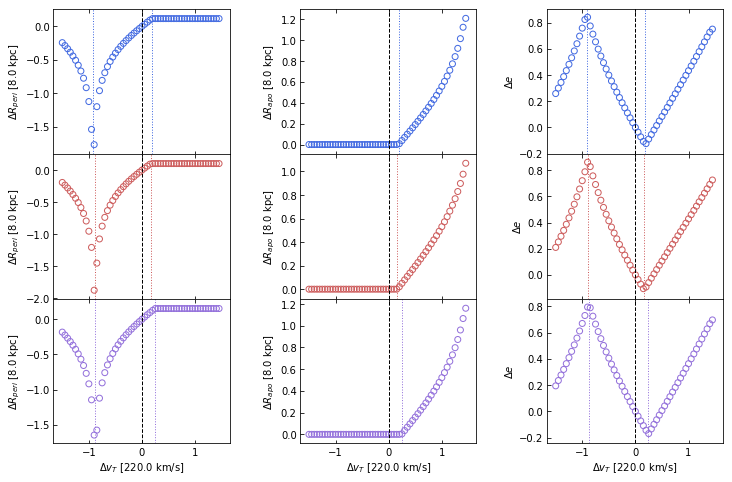

In [102]:
vT_range = np.arange(-1.5,1.5,0.05)

fig = plt.figure(figsize=(12,8))
axs = fig.subplots(nrows=len(orbit_vxvv), ncols=3)

for i in range(len(orbit_vxvv)):
    
    o = orbit.Orbit(vxvv=orbit_vxvv[i])
    o.turn_physical_off() # Specify in natural units
    o.integrate(times, pot)
    
    # Find an apocenter
    where_apo = np.argmax(o.R(times))
    R_apo = o.R(times)[where_apo]
    vR_apo = o.vR(times)[where_apo]
    vT_apo = o.vT(times)[where_apo]
    phi_apo = o.phi(times)[where_apo]
    
    # Also note the eccentricity and pericenter for comparison
    eccen = o.e()
    R_peri = o.rperi()
    
    # Loop over the range of kicks
    for j,dvT in enumerate(vT_range):
        
        o_temp = orbit.Orbit(vxvv=[R_apo,vR_apo,vT_apo+dvT,phi_apo])
        o_temp.integrate(times,pot)
        
        axs[i,0].scatter(dvT, np.log10(o_temp.rperi()/R_peri), edgecolor=orbit_colors[i], facecolor='None')
        axs[i,1].scatter(dvT, np.log10(o_temp.rap()/R_apo), edgecolor=orbit_colors[i], facecolor='None')
        axs[i,2].scatter(dvT, o_temp.e()-eccen, edgecolor=orbit_colors[i], facecolor='None')
        
        axs[i,0].set_ylabel('$\Delta R_{peri}$ ['+str(pot._ro)+' kpc]')
        axs[i,1].set_ylabel('$\Delta R_{apo}$ ['+str(pot._ro)+' kpc]')
        axs[i,2].set_ylabel('$\Delta e$')
        axs[i,0].tick_params(left='on', top='on', direction='in')
        axs[i,1].tick_params(left='on', top='on', direction='in')
        axs[i,2].tick_params(left='on', top='on', direction='in')
        if i != len(orbit_vxvv)-1:
            axs[i,0].tick_params(labelbottom='off')
            axs[i,1].tick_params(labelbottom='off')
            axs[i,2].tick_params(labelbottom='off')
        ##fi
    ###j
    axs[i,0].axvline(potential.vcirc(pot,R_apo,0)-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
    axs[i,1].axvline(potential.vcirc(pot,R_apo,0)-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
    axs[i,2].axvline(potential.vcirc(pot,R_apo,0)-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
    axs[i,0].axvline(-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
#     axs[i,1].axvline(-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
    axs[i,2].axvline(-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
    axs[i,0].axvline(0, linestyle='dashed', color='Black', lw=1)
    axs[i,1].axvline(0, linestyle='dashed', color='Black', lw=1)
    axs[i,2].axvline(0, linestyle='dashed', color='Black', lw=1)
###i

axs[-1,0].set_xlabel(r'$\Delta v_{T}$ ['+str(pot._vo)+' km/s]')
axs[-1,1].set_xlabel(r'$\Delta v_{T}$ ['+str(pot._vo)+' km/s]')
axs[-1,2].set_xlabel(r'$\Delta v_{T}$ ['+str(pot._vo)+' km/s]')
fig.subplots_adjust(hspace=0, wspace=0.4)

plt.show()
plt.close('all')

### Figure 7
Change in pericenter, apocenter, and eccentricity for tangential velocity kicks applied at apocenter.

Now apply a radial velocity kick at apocenter:

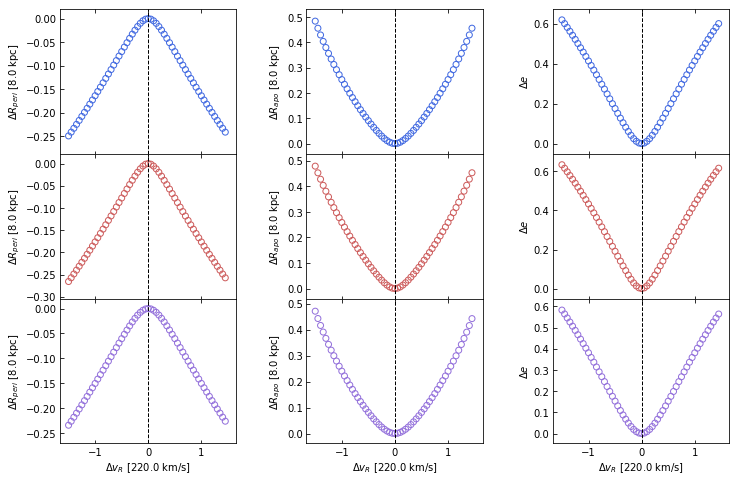

In [103]:
vR_range = np.arange(-1.5,1.5,0.05)

fig = plt.figure(figsize=(12,8))
axs = fig.subplots(nrows=len(orbit_vxvv), ncols=3)

for i in range(len(orbit_vxvv)):
    
    o = orbit.Orbit(vxvv=orbit_vxvv[i])
    o.turn_physical_off() # Specify in natural units
    o.integrate(times, pot)
    
    # Find an apocenter
    where_apo = np.argmax(o.R(times))
    R_apo = o.R(times)[where_apo]
    vR_apo = o.vR(times)[where_apo]
    vT_apo = o.vT(times)[where_apo]
    phi_apo = o.phi(times)[where_apo]
    
    # Also note the eccentricity and pericenter for comparison
    eccen = o.e()
    R_peri = o.rperi()
    
    # Loop over the range of kicks
    for j,dvR in enumerate(vR_range):
        
        o_temp = orbit.Orbit(vxvv=[R_apo,vR_apo+dvR,vT_apo,phi_apo])
        o_temp.integrate(times,pot)
        
        axs[i,0].scatter(dvR, np.log10(o_temp.rperi()/R_peri), edgecolor=orbit_colors[i], facecolor='None')
        axs[i,1].scatter(dvR, np.log10(o_temp.rap()/R_apo), edgecolor=orbit_colors[i], facecolor='None')
        axs[i,2].scatter(dvR, o_temp.e()-eccen, edgecolor=orbit_colors[i], facecolor='None')
        
        axs[i,0].set_ylabel('$\Delta R_{peri}$ ['+str(pot._ro)+' kpc]')
        axs[i,1].set_ylabel('$\Delta R_{apo}$ ['+str(pot._ro)+' kpc]')
        axs[i,2].set_ylabel('$\Delta e$')
        axs[i,0].tick_params(left='on', top='on', direction='in')
        axs[i,1].tick_params(left='on', top='on', direction='in')
        axs[i,2].tick_params(left='on', top='on', direction='in')
        if i != len(orbit_vxvv)-1:
            axs[i,0].tick_params(labelbottom='off')
            axs[i,1].tick_params(labelbottom='off')
            axs[i,2].tick_params(labelbottom='off')
        ##fi
    ###j
#     axs[i,0].axvline(potential.vcirc(pot,R_apo,0)-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
#     axs[i,1].axvline(potential.vcirc(pot,R_apo,0)-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
#     axs[i,2].axvline(potential.vcirc(pot,R_apo,0)-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
#     axs[i,0].axvline(-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
#     axs[i,1].axvline(-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
#     axs[i,2].axvline(-vT_apo, linestyle='dotted', color=orbit_colors[i], lw=1)
    axs[i,0].axvline(0, linestyle='dashed', color='Black', lw=1)
    axs[i,1].axvline(0, linestyle='dashed', color='Black', lw=1)
    axs[i,2].axvline(0, linestyle='dashed', color='Black', lw=1)
###i

axs[-1,0].set_xlabel(r'$\Delta v_{R}$ ['+str(pot._vo)+' km/s]')
axs[-1,1].set_xlabel(r'$\Delta v_{R}$ ['+str(pot._vo)+' km/s]')
axs[-1,2].set_xlabel(r'$\Delta v_{R}$ ['+str(pot._vo)+' km/s]')
fig.subplots_adjust(hspace=0, wspace=0.4)

plt.show()
plt.close('all')

### Figure 7
Change in pericenter, apocenter, and eccentricity for radial velocity kicks applied at apocenter.

Now apply the tangential velocity kick at a random point throughout the orbit:

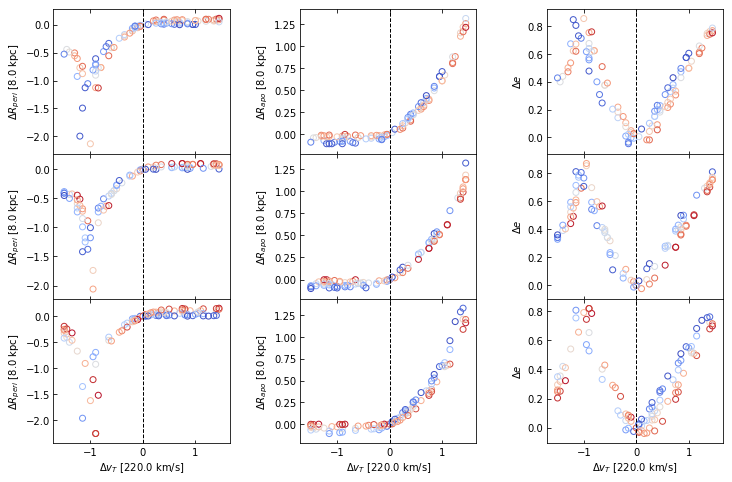

In [104]:
vT_range = np.arange(-1.5,1.5,0.05)

fig = plt.figure(figsize=(12,8))
axs = fig.subplots(nrows=len(orbit_vxvv), ncols=3)

for i in range(len(orbit_vxvv)):
    
    o = orbit.Orbit(vxvv=orbit_vxvv[i])
    o.turn_physical_off() # Specify in natural units
    o.integrate(times, pot)
    
    # Find the appropriate radial range to search
    R_apo = o.rap()
    R_peri = o.rperi()
    R_range = np.arange(R_peri,R_apo,0.01)
    
    # Also note the eccentricity for comparison
    eccen = o.e()
    
    # Create the color scalar mappable, because mpl is dumb
    norm = matplotlib.colors.Normalize(vmin=R_peri, vmax=R_apo)
    
    # Perform 100 random samples of radius and velocity kick
    samp_count = 0
    while samp_count < 100:
        
        # Pick a random radius and find it's location
        rad_rand = np.random.choice(R_range)
        where_rad = np.argmin( np.abs( rad_rand-o.R(times) ) )
        
        # Pick a random velocity kick
        dvT_rand = np.random.choice(vT_range)
        
        # Only do positive vR right now, continue otherwise
        # if o.vR(times)[where_rad] < 0: continue
        
        # Get the new orbital parameters
        R_new = o.R(times)[where_rad]
        vR_new = o.vR(times)[where_rad]
        vT_new = o.vT(times)[where_rad]
        phi_new = o.phi(times)[where_rad]
        
        o_temp = orbit.Orbit(vxvv=[R_new,vR_new,vT_new+dvT_rand,phi_new])
        o_temp.integrate(times,pot)
        
        # Make the color
        new_color = matplotlib.cm.coolwarm(norm(R_new))
        
        axs[i,0].scatter(dvT_rand, np.log10(o_temp.rperi()/R_peri), edgecolor=new_color, facecolor='None',
                        vmin=R_peri, vmax=R_apo, cmap='jet')
        axs[i,1].scatter(dvT_rand, np.log10(o_temp.rap()/R_apo), edgecolor=new_color, facecolor='None',
                        vmin=R_peri, vmax=R_apo, cmap='jet')
        axs[i,2].scatter(dvT_rand, o_temp.e()-eccen, edgecolor=new_color, facecolor='None',
                        vmin=R_peri, vmax=R_apo, cmap='jet')
        
        axs[i,0].set_ylabel('$\Delta R_{peri}$ ['+str(pot._ro)+' kpc]')
        axs[i,1].set_ylabel('$\Delta R_{apo}$ ['+str(pot._ro)+' kpc]')
        axs[i,2].set_ylabel('$\Delta e$')
        axs[i,0].tick_params(left='on', top='on', direction='in')
        axs[i,1].tick_params(left='on', top='on', direction='in')
        axs[i,2].tick_params(left='on', top='on', direction='in')
        
        samp_count += 1
    ###j
    axs[i,0].axvline(0, linestyle='dashed', color='Black', lw=1)
    axs[i,1].axvline(0, linestyle='dashed', color='Black', lw=1)
    axs[i,2].axvline(0, linestyle='dashed', color='Black', lw=1)
    if i != len(orbit_vxvv)-1:
            axs[i,0].tick_params(labelbottom='off')
            axs[i,1].tick_params(labelbottom='off')
            axs[i,2].tick_params(labelbottom='off')
    ##fi
###i

axs[-1,0].set_xlabel(r'$\Delta v_{T}$ ['+str(pot._vo)+' km/s]')
axs[-1,1].set_xlabel(r'$\Delta v_{T}$ ['+str(pot._vo)+' km/s]')
axs[-1,2].set_xlabel(r'$\Delta v_{T}$ ['+str(pot._vo)+' km/s]')
fig.subplots_adjust(hspace=0, wspace=0.4)

plt.show()
plt.close('all')

### Figure 8
Change in pericenter, apocenter, and eccentricity for tangential velocity kicks applied at a random radius. The colors represent the radius at which the kick was applied: ranging from pericenter (blue), to apocenter (red). Notice that there is a small difference between kicks applied closer to pericenter (blue points) and those applied at apocenter (red points). This is because a tangential velocity kick of one magnitude at pericenter yields a change in angular momentum that is smaller than the change in angular momentum that the same kick would yield at apocenter, because the radius is larger. The fact that the spread is not large is reflective of the range in radii these orbits explore. Note that there is no separation between $v_{R}>0$ and $v_{R}<0$, because the angular momentum of an orbit depends only on it's radius and not the sign of it's radial velocity. Overall there is similarity between these results and the results found above for the purely pericenter/apocenter cases, suggesting that the change in orbital parameters is dependent on the kick recieved, rather than the radius at which it occurs.

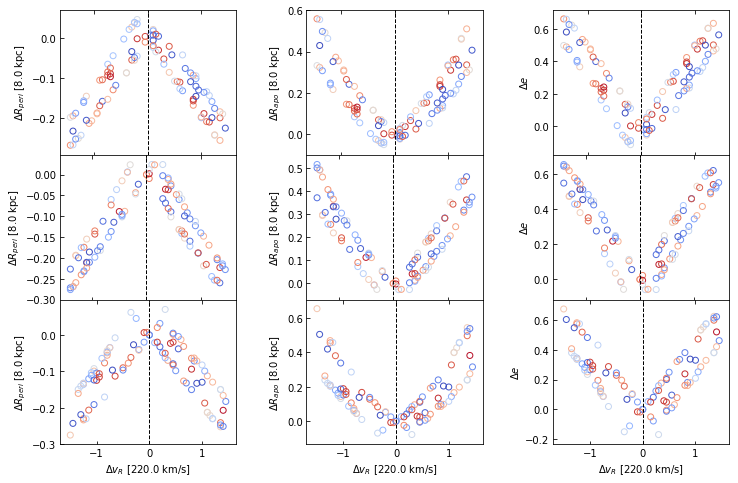

In [105]:
vR_range = np.arange(-1.5,1.5,0.05)

fig = plt.figure(figsize=(12,8))
axs = fig.subplots(nrows=len(orbit_vxvv), ncols=3)

for i in range(len(orbit_vxvv)):
    
    o = orbit.Orbit(vxvv=orbit_vxvv[i])
    o.turn_physical_off() # Specify in natural units
    o.integrate(times, pot)
    
    # Find the appropriate radial range to search
    R_apo = o.rap()
    R_peri = o.rperi()
    R_range = np.arange(R_peri,R_apo,0.01)
    
    # Also note the eccentricity for comparison
    eccen = o.e()
    
    # Create the color scalar mappable, because mpl is dumb
    norm = matplotlib.colors.Normalize(vmin=R_peri, vmax=R_apo)
    
    # Perform 100 random samples of radius and velocity kick
    samp_count = 0
    while samp_count < 100:
        
        # Pick a random radius and find it's location
        rad_rand = np.random.choice(R_range)
        where_rad = np.argmin( np.abs( rad_rand-o.R(times) ) )
        
        # Pick a random velocity kick
        dvR_rand = np.random.choice(vR_range)
        
        # Only do negative vR now, continue otherwise
        # if o.vR(times)[where_rad] > 0: continue
        
        # Get the new orbital parameters
        R_new = o.R(times)[where_rad]
        vR_new = o.vR(times)[where_rad]
        vT_new = o.vT(times)[where_rad]
        phi_new = o.phi(times)[where_rad]
        
        o_temp = orbit.Orbit(vxvv=[R_new,vR_new+dvR_rand,vT_new,phi_new])
        o_temp.integrate(times,pot)
        
        # Make the color
        new_color = matplotlib.cm.coolwarm(norm(R_new))
        
        axs[i,0].scatter(dvR_rand, np.log10(o_temp.rperi()/R_peri), edgecolor=new_color, facecolor='None',
                        vmin=R_peri, vmax=R_apo, cmap='jet')
        axs[i,1].scatter(dvR_rand, np.log10(o_temp.rap()/R_apo), edgecolor=new_color, facecolor='None',
                        vmin=R_peri, vmax=R_apo, cmap='jet')
        axs[i,2].scatter(dvR_rand, o_temp.e()-eccen, edgecolor=new_color, facecolor='None',
                        vmin=R_peri, vmax=R_apo, cmap='jet')
        
        axs[i,0].set_ylabel('$\Delta R_{peri}$ ['+str(pot._ro)+' kpc]')
        axs[i,1].set_ylabel('$\Delta R_{apo}$ ['+str(pot._ro)+' kpc]')
        axs[i,2].set_ylabel('$\Delta e$')
        axs[i,0].tick_params(left='on', top='on', direction='in')
        axs[i,1].tick_params(left='on', top='on', direction='in')
        axs[i,2].tick_params(left='on', top='on', direction='in')
        
        samp_count += 1
    ###j
    axs[i,0].axvline(0, linestyle='dashed', color='Black', lw=1)
    axs[i,1].axvline(0, linestyle='dashed', color='Black', lw=1)
    axs[i,2].axvline(0, linestyle='dashed', color='Black', lw=1)
    if i != len(orbit_vxvv)-1:
            axs[i,0].tick_params(labelbottom='off')
            axs[i,1].tick_params(labelbottom='off')
            axs[i,2].tick_params(labelbottom='off')
    ##fi
###i

axs[-1,0].set_xlabel(r'$\Delta v_{R}$ ['+str(pot._vo)+' km/s]')
axs[-1,1].set_xlabel(r'$\Delta v_{R}$ ['+str(pot._vo)+' km/s]')
axs[-1,2].set_xlabel(r'$\Delta v_{R}$ ['+str(pot._vo)+' km/s]')
fig.subplots_adjust(hspace=0, wspace=0.4)

plt.show()
plt.close('all')

### Figure 9
Change in pericenter, apocenter, and eccentricity for radial velocity kicks applied at a random radius. The colors represent the radius at which the kick was applied: ranging from pericenter (blue), to apocenter (red). Notice that now there are two trends, which have a mix of pericenter and apocenter points. This is because the sign of the radial velocity is important for the effects of a radial velocity kick. Overall there is similarity between these results and the results found above for the purely pericenter/apocenter cases, suggesting that the change in orbital parameters is dependent on the kick recieved, rather than the radius at which it occurs.

# Q3: Velocity structure of Dark Matter Halos

## a) Constant $\beta$ for the logarithmic potential

The radial velocity dispersion for a constant $\beta$ anisotropy parameter takes the form (6.45 in AST 1420 notes):

$
\nu \sigma_{r}^{2} = r^{-2\beta} \int^{\infty}_{r} dr^{\prime} r^{\prime2\beta} \nu(r^{\prime}) \frac{ d\Phi }{ dr }
$

For the logarithmic potential:

$
\Phi(r) = v_{c}^{2} \ln r
$

$
\frac{d\Phi}{dr} = \frac{ v_{c}^{2} }{ r }
$

Since the dark matter is both what forms the potential and the tracer in this problem $\nu \rightarrow \rho$. The density is therefore given by the Poisson equation:

$
\nabla^{2}\Phi = \frac{ 1 }{ r^{2} } \frac{ \partial }{ \partial r } \big( r^{2} \frac{ \partial }{ \partial r } \big) \Phi
$

$
\nabla^{2}\Phi = \frac{ v_{c}^{2} }{ r^{2} } \frac{ \partial }{ \partial r } \big( r^{2} \frac{ 1 }{ r } \big)
$

$
4 \pi G \rho =  \frac{ v_{c}^{2} }{ r^{2} }
$

$
\rho = \frac{ v_{c}^{2} }{ 4 \pi G r^{2} } = \nu
$

Plug this into equation **?**:

$
\big( \frac{ v_{c}^{2} }{ 4 \pi G r^{2} } \big) \sigma_{r}^{2} = r^{-2\beta} \int^{\infty}_{r} dr^{\prime} r^{\prime2\beta} \big( \frac{ v_{c}^{2} }{ 4 \pi G r^{\prime2} } \big) \frac{ v_{c}^{2} }{ r^{\prime} }
$

Many of the constants cancel:

$
\big( \frac{ \sigma_{r}^{2} }{ r^{2} } \big) = v_{c}^{2} r^{-2\beta} \int^{\infty}_{r} dr^{\prime} r^{\prime2\beta-3}
$

$
\sigma_{r}^{2} = v_{c}^{2} r^{-2\beta+2} \int^{\infty}_{r} dr^{\prime} r^{\prime2\beta-3}
$

$
\sigma_{r}^{2} = v_{c}^{2} r^{-2\beta+2} \bigg(  \frac{ r^{\prime2\beta-2} }{ 2\beta-2 } \bigg\rvert^{\infty}_{r} \bigg)
$

Now we know that $\beta$ is bounded such that $-\infty \leq \beta < 1 $. Since $\beta$ can never equal $1$ the integral will always go to $0$ when evaluated at $\infty$. Therefore the answer is:

$
\sigma_{r}^{2} = v_{c}^{2} r^{-2\beta+2} \bigg( 0 - \frac{ r^{2\beta-2} }{ 2\beta-2 } \bigg)
$

The radial terms cancel, leaving only constants remaining:

$
\sigma_{r}^{2} = \frac{ v_{c}^{2} }{ 2-2\beta }
$

Or:

$
\sigma_{r} = \sqrt{ \frac{ v_{c}^{2} }{ 2-2\beta } } 
$

Which is a constant value.

## b) Osipkov-Merrit model for the logarithmic potential

This problem is similar to the above problem, except that $\beta(r) = \frac{ r^{2} }{ r^{2}+1 } $. This requires using an equation for the radial velocity dispersion where $\beta$ varies with $r$ (6.49 in AST 1420 notes):

$  
\nu \sigma_{r}^{2} = \frac{ \int^{\infty}_{r} dr^{\prime} \text{e}^{ \gamma(r) } \nu(r^{\prime}) \frac{ d\Phi }{ dr } }{ \text{e}^{ \gamma(r) } }
$

Where:

$
\gamma(r) = 2 \int^{r}_{r_{0}} dr^{\prime} \frac{ \beta(r^{\prime}) }{ r^{\prime} }
$

$
\gamma(r) = 2 \int^{r}_{r_{0}} dr^{\prime} \frac{ r^{\prime} }{ r^{\prime2} + 1 }
$

It is straightforward to see that the solution to this integral is:

$
2 \int^{r}_{r_{0}} dr^{\prime} \frac{ r^{\prime} }{ r^{\prime2} + 1 } = 2 \bigg(  \frac{ \ln( r^{2}+1 ) }{ 2 } \bigg\rvert^{r}_{r_{0}} \bigg)
$

Now it is valid to set the lower bound to $r_{0} = 0$ since the integral will then be evaluated as $\ln(1)/2=0$. So then cancelling the factors of 2 we have:

$
\gamma(r) = \ln(r^{2}+1)-0
$

Now since $\gamma(r)$ appears in the exponent of e, it can be simplified:

$
\text{e}^{\gamma(r)} = r^{2}+1
$

therefore the equation for the radial velocity dispersion becomes:

$
\big( \frac{ v_{c}^{2} }{ 4 \pi G r^{2} } \big) \sigma_{r}^{2} = \frac{ \int^{\infty}_{r} dr^{\prime} (r^{\prime2}+1) \big( \frac{ v_{c}^{2} }{ 4 \pi G r^{\prime2} } \big) \frac{ v_{c}^{2} }{ r^{\prime} }}{ r^{2}+1 }
$

Get rid of the constants

$
\sigma_{r}^{2} = \frac{v_{c}^{2} r^{2}}{r^{2}+1}  \int^{\infty}_{r} dr^{\prime} (r^{\prime2}+1)  \frac{1}{r^{\prime3}}
$

$
\sigma_{r}^{2} = \frac{v_{c}^{2} r^{2}}{r^{2}+1}  \int^{\infty}_{r} dr^{\prime} (r^{\prime-3}+r^{\prime-1})
$

Now this integral clearly doesn't converge at $\infty$?

If we just integrate the differential equation (AST 1420 notes 6.43) we can see what happens. First separate the density using the chain rule and the product rule:

$
\frac{ d \nu \sigma_{r}^{2} }{ dr } = \frac{ \nu d \sigma_{r}^{2} }{dr} - \sigma_{r}^{2} \nu \big( \frac{2}{r} \big)
$

Now equation 6.43 becomes, with $y=\sigma_{r}^{2}$

$
\frac{dy}{dr} - \frac{2y}{r} + \frac{2\beta y}{r} = \frac{-v_{c}^{2}}{r}
$

Where $\nu$ has cancelled from every term. Bringing terms together, setting $\beta$, and letting $y=\sigma_{r}^{2}/v_{c}^{2}$ we have:

$
\frac{dy}{dr} = \frac{2y}{r} - \frac{2ry}{r^{2}+1} - \frac{1}{r}
$

Now at $r=0$ we know $\beta \rightarrow 0$, so $\sigma_{r}^{2} = v_{c}^{2}/2$. Solve the equation:

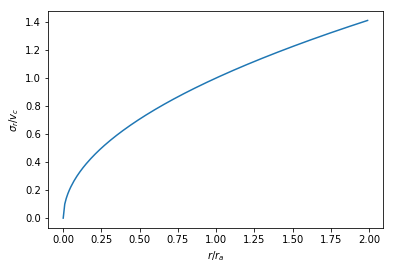

In [106]:
# Integrate the solution

def diff_eq(y,r):
    dydr = (2*y)/r - (2*y*r)/((r**2)+1) - (1/r)
    return dydr
#def

radii = np.arange(0.0,2.,0.01)
y0 = 1/2

sol = odeint(diff_eq2, radii, y0)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(radii, np.sqrt(sol[0]) )
ax.set_xlabel(r'$r/r_{a}$')
ax.set_ylabel(r'$\sigma_{r}/v_{c}$')

plt.show()
plt.close('all')

### Figure 10
While this solution matches predicted values for $\beta$, it does not plateau at $\sigma_{r}=1$ as expected. I'm not sure what went wrong with this question.

## c) NFW Halos

Setting $v_{c}=1$ at $r=a/2$ yields: 

$
\rho_{0}=\frac{1}{8 \pi G a^{2} ( \ln(3/2)-1/3 ) }
$

We will label the factor $( \ln(3/2)-1/3 )=b$

The density therefore becomes:

$
\rho = \frac{ ( 8 \pi G a^{2} b)^{-1} }{ r/a (1+r/a)^{2} }
$

The potential is:

$
\Phi(r) = \frac{-1}{2b} \frac{ \ln(1+r/a) }{ r/a }
$

And the derivative of the potential is:

$
\frac{d\Phi}{dr} = \frac{-1}{2b} \big( \frac{ 1 }{ r(1+r/a) } - \frac{ \ln(1+r/a) }{ r^{2}/a } \big)
$

We approach this problem in a similar manner as above. First begin with the case where $\beta$ is constant. We have that:

$
\nu \sigma_{r}^{2} = r^{-2\beta} \int^{\infty}_{r} dr^{\prime} r^{\prime2\beta} \nu(r^{\prime}) \frac{ d\Phi }{ dr }
$

Which becomes:

$
\frac{ ( 8 \pi G a^{2} b)^{-1} }{ r/a (1+r/a)^{2} } \sigma_r^{2} = r^{-2\beta} \int^{\infty}_{r} dr^{\prime} r^{\prime2\beta} \frac{ ( 8 \pi G a^{2} b)^{-1} }{ r^{\prime}/a (1+r^{\prime}/a)^{2} } \frac{-1}{2b} \big( \frac{ 1 }{ r^{\prime}(1+r^{\prime}/a) } - \frac{ \ln(1+r^{\prime}/a) }{ r^{\prime2}/a } \big)
$

$
\frac{ \sigma_{r}^{2} }{ (1+r/a)^{2} } = \frac{-r^{-2\beta+1}}{2b} \int^{\infty}_{r} dr^{\prime} r^{\prime2\beta} \frac{ 1 }{ (1+r^{\prime}/a)^{2}r^{2} } \big( \frac{ 1 }{ (1+r^{\prime}/a) } - \frac{ \ln(1+r^{\prime}/a) }{ r^{\prime}/a } \big)
$

$
\sigma_{r}^{2} = \frac{(1+r/a)^{2}r^{-2\beta+1}}{2b} \int^{\infty}_{r} dr^{\prime} r^{\prime2\beta} \big( \frac{ \ln(1+r^{\prime}/a) }{ (1+r^{\prime}/a)^{2}r^{\prime3}/a } - \frac{ 1 }{ (1+r^{\prime}/a)^{3}r^{\prime2} } \big)
$

Now this will be implemented numerically. First a function will be defined to evaluate the inside of the integral. Then another function will be defined which evaluates both the integral and the remaining radial dependant terms to solve for the velocity dispersion:

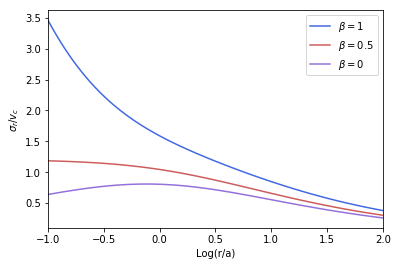

In [107]:
# Define the functions

def nfw_constant_beta_integral2(r,beta):
    return ( r**(2*beta) * ( ( np.log(1+r) / ( (r**3)*(1+r)**2 ) ) - (1/( (r**2)*(1+r)**3 )) ) )
#def

def nfw_constant_beta_solver(radii,beta):
    
    # Definitions
    b = np.log(1.5)-1/3
    sig = np.zeros(len(radii))
    
    # Loop over the radial values.
    for i,r in enumerate(radii):
        integral = quad( nfw_constant_beta_integral2, r, np.inf, args=(beta,) )[0]
        sig2 = (1+r)**2 * r**(-2*beta+1) * integral / (2*b)
        sig[i] = np.sqrt(sig2)
    ###i
    
    return sig
#def

# Now define 0.1-100 in logspace and solve for beta=1,0.5,0
radii = np.logspace(-1,2,num=100)
sig_beta1 = nfw_constant_beta_solver(radii,1)
sig_beta05 = nfw_constant_beta_solver(radii,0.5)
sig_beta0 = nfw_constant_beta_solver(radii,0)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( np.log10(radii), sig_beta1, color=orbit_colors[0], label=r'$\beta=1$')
ax.plot( np.log10(radii), sig_beta05, color=orbit_colors[1], label=r'$\beta=0.5$' )
ax.plot( np.log10(radii), sig_beta0, color=orbit_colors[2], label=r'$\beta=0$' )

ax.set_xlabel('Log(r/a)')
ax.set_ylabel(r'$\sigma_{r}/v_{c}$')
ax.set_xlim(-1,2)

ax.legend()

plt.show()
plt.close('all')

### Figure 11
The velocity dispersion as a function of logarithmic radius for NFW halos and 3 values of $\beta$

Now to add in the Ossipkov-Merrit solution we take our integral solution from above and replace the $r^{2\beta}$ add the integrating factors, which as before take the form:

$
\text{e}^{\gamma(r)} = r^{2}+r_{a}^{2}
$

Implementing these in the above integral solution gives:

$
\sigma_{r}^{2} = \frac{r(1+r/a)^{2}}{2b(r^{2}+r_{a}^{2})} \int^{\infty}_{r} dr^{\prime} (r^{\prime2}+r_{a}^{2}) \big( \frac{ \ln(1+r^{\prime}/a) }{ (1+r^{\prime}/a)^{2}r^{\prime3}/a } - \frac{ 1 }{ (1+r^{\prime}/a)^{3}r^{\prime2} } \big)
$

Now adjust both functions defined above and input $r_{a}=40a/3$

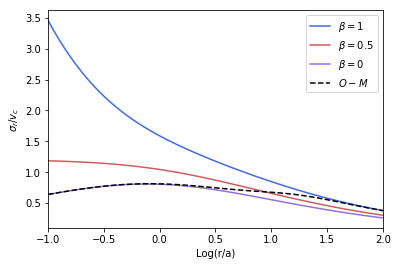

In [108]:
# Implementing the two new functions (set a=1 throughout for ease):

def nfw_om_beta_integral(r,ra):
    return ( (r**2+ra**2) * ( ( np.log(1+r) / ( (r**3)*(1+r)**2 ) ) - (1/( (r**2)*(1+r)**3 )) ) )
#def
    
def nfw_om_beta_solver(radii):
    
    # Definitions
    ra = 40/3
    b = np.log(1.5)-1/3
    sig = np.zeros(len(radii))
    
    # Loop over the radial values
    for i,r in enumerate(radii):
        integral = quad( nfw_om_beta_integral, r, np.inf, args=(ra,) )[0]
        sig2 = (r*(1+r)**2) * integral / ( (2*b) * (r**2+ra**2) )
        sig[i] = np.sqrt(sig2)
    ###i
    
    return sig
#def

# Solve for the O-M beta model
sig_om = nfw_om_beta_solver(radii)

# Plot, including constant beta from above.
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( np.log10(radii), sig_beta1, color=orbit_colors[0], label=r'$\beta=1$')
ax.plot( np.log10(radii), sig_beta05, color=orbit_colors[1], label=r'$\beta=0.5$' )
ax.plot( np.log10(radii), sig_beta0, color=orbit_colors[2], label=r'$\beta=0$' )
ax.plot( np.log10(radii), sig_om, color='Black', label=r'$O-M$', linestyle='dashed' )

ax.set_xlabel('Log(r/a)')
ax.set_ylabel(r'$\sigma_{r}/v_{c}$')
ax.set_xlim(-1,2)

ax.legend()

plt.show()
plt.close('all')

### Figure 12
Same as Figure with the addition of the Ossipkov-Merrit solution, which smoothly transitions between the $\beta=0$ solution and the $\beta=1$ solution.